In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [2]:
kdata = pd.read_csv('data.csv', header=0)

In [3]:
kdata.columns

Index([u'action_type', u'combined_shot_type', u'game_event_id', u'game_id',
       u'lat', u'loc_x', u'loc_y', u'lon', u'minutes_remaining', u'period',
       u'playoffs', u'season', u'seconds_remaining', u'shot_distance',
       u'shot_made_flag', u'shot_type', u'shot_zone_area', u'shot_zone_basic',
       u'shot_zone_range', u'team_id', u'team_name', u'game_date', u'matchup',
       u'opponent', u'shot_id'],
      dtype='object')

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
kdata.loc[kdata.shot_made_flag.isnull()]

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
7,Jump Shot,Jump Shot,254,20000012,34.0163,1,28,-118.2688,8,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,8
16,Driving Layup Shot,Layup,100,20000019,34.0443,0,0,-118.2698,0,1,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-11-01,LAL vs. UTA,UTA,17
19,Driving Layup Shot,Layup,249,20000019,34.0443,0,0,-118.2698,10,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-11-01,LAL vs. UTA,UTA,20
32,Jump Shot,Jump Shot,4,20000047,33.9683,163,76,-118.1068,11,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-11-04,LAL @ VAN,VAN,33
33,Jump Shot,Jump Shot,8,20000047,33.8503,70,194,-118.1998,10,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-11-04,LAL @ VAN,VAN,34
34,Layup Shot,Layup,26,20000047,34.0253,1,19,-118.2688,7,1,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-11-04,LAL @ VAN,VAN,35
35,Layup Shot,Layup,37,20000047,34.0293,-12,15,-118.2818,5,1,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-11-04,LAL @ VAN,VAN,36
36,Reverse Layup Shot,Layup,53,20000047,34.0403,1,4,-118.2688,4,1,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-11-04,LAL @ VAN,VAN,37
37,Jump Shot,Jump Shot,165,20000047,33.9283,-117,116,-118.3868,5,2,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-11-04,LAL @ VAN,VAN,38


In [6]:
kdata.loc[kdata.combined_shot_type.isnull()]

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id


In [7]:
pd.get_dummies(kdata.combined_shot_type)

,Bank Shot,Dunk,Hook Shot,Jump Shot,Layup,Tip Shot
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,0,1,0,0,0,0
5,0,0,0,1,0,0
6,0,0,0,0,1,0
7,0,0,0,1,0,0
8,0,0,0,1,0,0
9,0,0,0,1,0,0


In [8]:
plt.figure()

In [9]:
shot_types = kdata.combined_shot_type.unique()
print shot_types

['Jump Shot' 'Dunk' 'Layup' 'Tip Shot' 'Hook Shot' 'Bank Shot']


In [10]:
labels, levels = pd.factorize(kdata.combined_shot_type)
print labels

[0 0 0 ..., 0 0 0]


MemoryError: 

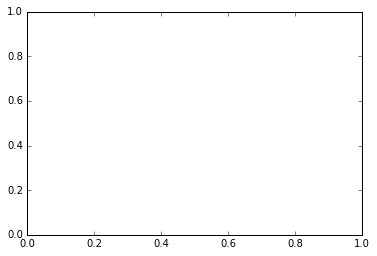

In [61]:
kbplot = .plot(x = labels, y = 'lat', kind='scatter')
kbplot.set_xticklabels(shot_types)
plt.show()

In [34]:
plt.figure();
kdata['game_id'].diff().hist(stacked=True, bins = 20, colunmns=['combined_shot_type'])
plt.show()

AttributeError: Unknown property colunmns